# Basic Analysis of a Binary Star  💫💫 # 
(or, Data Analysis and Fancy Plots in Python)

By Katherine Song


## Background ## 

One of the mysteries in astrophysics is the formation and evolution of short period binary stars. __A binary star is made up of two gravitationally bound stars that orbit each other__, although they mostly appear as a single star to the naked eye. When they first form, both component stars are in the pre-main-sequence phase (i.e. very young), so their initial orbit must be large enough to accommodate their puffy sizes at around ~2000 solar radii. 


Knowing this, it is puzzling that a large proportion of the observed eclipsing binary stars have a period of less than one day, which corresponds to a separation that is just a few solar radii. In order for these short-period binary stars to exist, they must have gone through some process which caused their orbits to shrink dramatically (Hwang, 2020). However, it is not known what process is responsible for the orbital evolution. 

Although recent studies have proposed several possible mechanisms that could be involved, such as interaction with a third body, stellar winds, and magnetic activity (Fabrycky & Tremaine, 2007; El-Badry et al., 2022), these scenarios remain to be fully tested by observations. Thus, it is not yet clear what the effects of each are or if there is some other unidentified process happening. __Analysis of binary stars could potentially unlock deep secrets of the universe.__

These __proposed mechanisms can be tested based on their consistency with orbital period changes measured from light curves__. A light curve is a graph that shows the brightness (measured in this guide by flux) of an object over a period of time (NASA, 2013). In particular, a model based on a proposed physical theory is developed, and the expected data generated by the model is compared with observational data (Borkovitz, 2016). This is one of the major ways in which researchers are evaluating mechanisms. 

![Url](https://upload.wikimedia.org/wikipedia/commons/0/0e/Orbit5.gif)
<center> <i> (Zhatt, 2005) 
    Depiction of a binary star where both components are roughly the same size and have elliptical orbits.  We can see that the orbits cross paths twice, showing that there are two eclipses in one orbit for each star! Later, we will see how the two eclipses show up in the data. Keep in mind that binary stars can have a wide variety of orbit patterns. </i> </center>

## In this guide ## 
While the different models and the physics behind them is a complex topic that requires an advanced background in physics and astronomy, **in this guide we will learn how to see firsthand how the period of a binary star is changing over time**, the phenomenon that still has researchers stumped. This can serve as a launchpad for your own astronomical adventures or simply an exercise to feed your curiosity. 

Here are some other things we will accomplish along the way: 
1. Learn some basic commands in the Lightkurve Python package, a powerful tool for analyzing data from TESS and Kepler telescopes
2. Search for and download data from TESS 
3. Find and visualize changes in the orbital period over time via phase-folding
4. Customize plots using the matplotlib package in Python 


## What you will need ##
- Access to a computer or laptop, along with internet
- Some programming environment; for anyone new to coding, Jupyter Notebook is recommended, but as long as you have a platform that allows you to use Python, this guide can be followed. 
    - For beginners: the easiest way to get started with Jupyter Notebook is to download the full version of Anaconda, which is a platform that makes a host of open-access data science tools easy to access, especially for beginners. Instructions can be found on the Anaconda website. 
- The latest version of Python (comes with Anaconda) 
- The following Python packages:
    - `numpy` 
    - `matplotlib`
    - `Lightkurve`; download instructions and troubleshooting here: https://docs.lightkurve.org/about/install.html


## Let's get started! ##

### 1) Import packages ###
- Make sure you have packages downloaded before trying to import them!! 
- Open Jupyter Notebook through Anaconda and import packages 
- I have some formatting commands that make the plots look nicer; feel free to copy!

In [27]:
# let's import some packages via the following code
# make sure you have them downloaded first! 

import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

# these are some formatting commands for plots and images! 
%matplotlib inline 
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 100

### 2) Get the data ###
Let's say we've already found a target of interest with coordinates `ra = 91.98070326255153, dec = -66.3599094332912`. We can use these coordinates to search for it using the `lk.search_lightcurve()` command as shown below. This searches the TESS database for data corresponding to those coordinates. 

- Each search result corresponds to a section of the lightcurve over a time interval.
- The search might take a minute to load, be patient! However, if it's taking more than 5 minutes, something is probably wrong and you should stop running the code. Make sure that the coordinates follow the same formatting as below, with a space between the two coordinates.

In [2]:
search_result = lk.search_lightcurve('91.98070326255153 -66.3599094332912')
    
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,41232835,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,41232835,0.0
2,TESS Sector 01,2018,QLP,1800,41232835,0.0
3,TESS Sector 01,2018,TASOC,120,41232835,0.0
4,TESS Sector 01,2018,TGLC,1800,41232835,0.0
5,TESS Sector 01,2018,TGLC,1800,736843166,0.0
...,...,...,...,...,...,...
71,TESS Sector 67,2023,TESS-SPOC,200,41232835,0.0
72,TESS Sector 67,2023,QLP,200,41232835,0.0


If there are multiple search results, then we want to download all of them and stitch them together to get the overall light curve over all possible times. Here, we should specify the `author` of the light curve. 
- Below, I specify the author as `QLP`, which means that the data was preprocessed by MIT's Quick Look Pipeline. Other authors can be seen in the search result above, and you can click on the hyperlink to learn more about them.
- The specific author doesn't matter too much, but we do want to specify a single author so that the data is consistent and isn't redundant!

In [3]:
# Note that our search object has multiple entries, representing multiple light curves. 
# Let's gather all the data and stitch them together into one giant light curve. 

author = 'QLP' # preprocessing by MIT Quick Look Pipeline
target_name = '41232835' 
    
t_download = ((search_result.author.data == author))

light_curves = search_result[t_download].download_all()

lc = light_curves.stitch(corrector_func=lambda x: x.normalize())

### 2.5) Explore the raw data ### 

Now that we have our light curve downloaded, let's see what we're working with! Below, we look at the raw data, as well as some metadata (data besides the time and flux that is included in the lightcurve object) and then graph the entire light curve as a scatterplot. 

In [4]:
# Let's look at the first 5 entries: 

lc[:5]

time,flux,flux_err,cadenceno,sap_flux,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err
,,,,,,,pix,pix,,
Time,float32,float64,int32,float32,int32,int32,float32,float32,float32,float32
1325.3234660277578,0.8497300148010254,0.14142780005931854,4697,0.85070276,4096,9,2079.239990234375,1992.5980224609375,-1135.85,995.95
1325.344299320331,0.9267822504043579,0.14142780005931854,4698,0.9278432,4096,9,2079.239013671875,1992.593994140625,-1183.33,908.68
1325.3651326145061,1.0674176216125488,0.14142780005931854,4699,1.0686395,4096,9,2079.237060546875,1992.5870361328125,-739.22,825.37
1325.3859659102482,1.12057626247406,0.14142780005931854,4700,1.1218591,4096,9,2079.237060546875,1992.5860595703125,-827.22,735.4
1325.4067992075222,1.0453580617904663,0.14142780005931854,4701,1.0465548,4096,9,2079.238037109375,1992.5880126953125,-1104.7,745.14


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

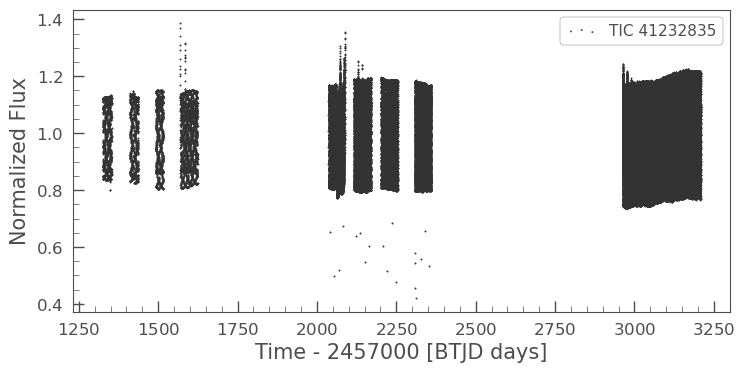

In [5]:
# this is what the entire lc looks like 
lc.scatter()

Notice that there are some weird outliers on the plot, i.e. some points that don't seem to fit in with the others, located outside of the main clumps. While they might be be genuine data on the target, they could also be due to instrumental errors or bad conditions. 


### 3) Clean the data ###

Luckily, in the metadata there is a column called `quality`, which denotes the quality of that data point (0 being the best).

This is also a good time to explore different features of the data such as zooming in on different parts of the light curve and examining the metadata. 

In [6]:
# Filter the data so that we reduce some of the noise - take only points labeled as highest quality
# Note that lc is an object in LightCurve object in Lightkurve

lcq = lc[lc['quality']==0]

print("Number of points left:", len(lcq))
print("Number of points eliminated:", len(lc) - len(lcq))

Number of points left: 120251
Number of points eliminated: 12994


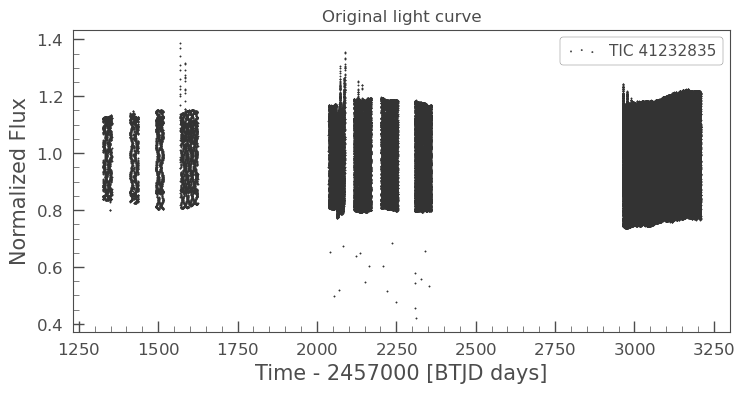

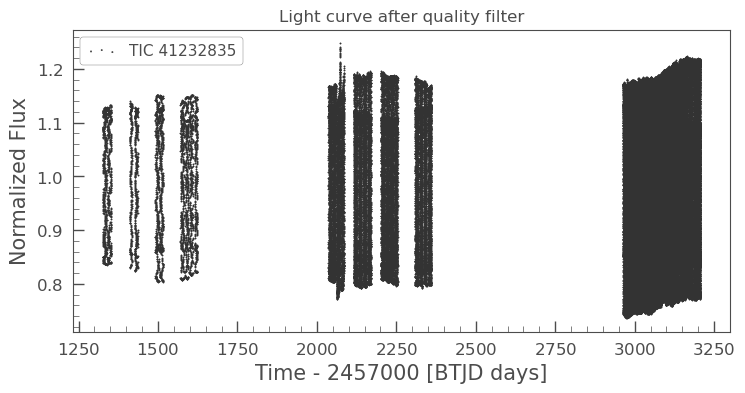

In [26]:
# compare before and after

lc.scatter() # original data
plt.title('Original light curve')
plt.show() 

lcq.scatter() #filtered data
plt.title('Light curve after quality filter')
plt.show() 

### 4. Initial estimate of the orbital period ###

- *Orbital period:* the amount of time a given astronomical object takes to complete one orbit around another object, equal for both component stars in the binary (we measure in days) 
- *Frequency:* orbits in a day

The period and frequency are related by the following equation:

$Frequency = 1/Period$

Looking at the zoomed in light curve above, we expect the period will be less than a day. There is a way to determine this more rigorously, and this is by using a periodogram. Essentially, what a periodogram does is similar to a Fourier Transform: it assigns relative strengths to possible period values and returns a graph. Luckily, lightkurve has a handy builtin function to do this! 

In [8]:
pg = lcq.normalize(unit='ppm').to_periodogram()
pg

LombScarglePeriodogram(ID: TIC 41232835)

0.11970561121532632 d


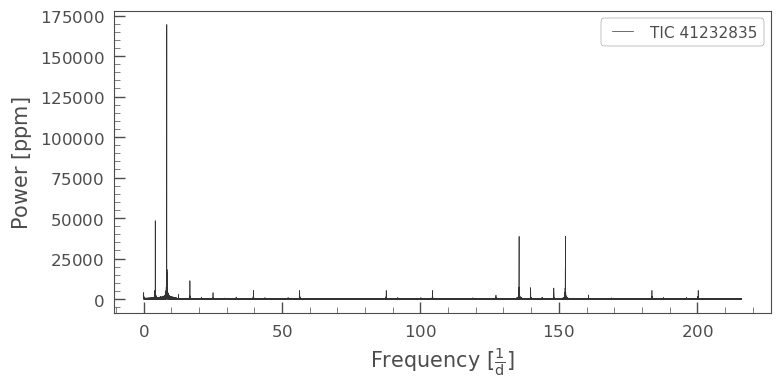

In [9]:
pg.plot()

period = pg.period_at_max_power
print(period)

### 5. Phase fold to test the initial estimate ###
Phase-folding is essentially taking period-length chunks of the light curve and superimposing them over each other.

Here, we use Lightkurve's inbuild function `.fold()` to perform this operation using the period we just found. 

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

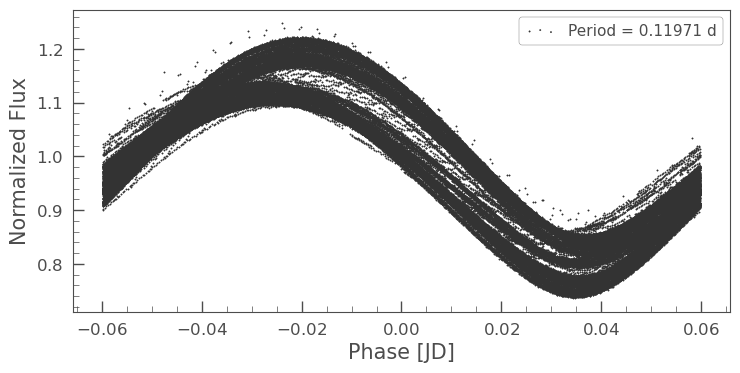

In [10]:
lcq.fold(period).scatter(label=f'Period = {period.value:.5f} d')

Upon visual inspection, this doesn't seem to be the best fit for several reasons: 
1. The points aren't very well aligned 
2. In fact, there seem to be two curves that the points fall into, with a considerable gap between them 
3. Remember that we should be seeing two eclipses per period, and this only shows one! 
4. Maybe if we double the period, we'll get the two eclipses and separate the curves... 

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

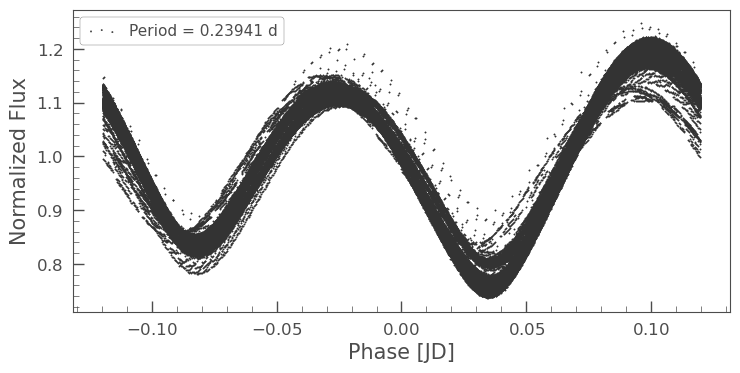

In [11]:
# try multiplying by 2 to account for both eclipses
period *= 2
lcq.fold(period).scatter(label=f'Period = {period.value:.5f} d')

Aha! This does seem to be a better fit, at least visually. While there are mathematically rigorous ways to determine this, that is beyond the scope of this guide. Now that we have a better estimate, let's try to recalculate the period formally to get a more accurate value. (Note that if your period value already accounts for the two eclipses, then it is up to you how accurate you want to get with the following step.)

### 6. Adjusting the period estimate ###
Finding the period of this eclipsing binary is all good and well, but it’s not yet very precise, as the fold() plot indicates. Using keyword arguments of the to_periodogram() function, we can improve this estimate. Try one or both of the following: 
- Use the `minimum_period` and `maximum_period` arguments to limit the range of the periodogram to the area around the peak we are interested in. 
- Increase the `oversample_factor` argument from the default value of 1, which increases the resolution of the periodogram (this is at the expense of correlating the power values, but that is not a problem for the type of analysis we’re doing here).

<Quantity 0.23941271 d>

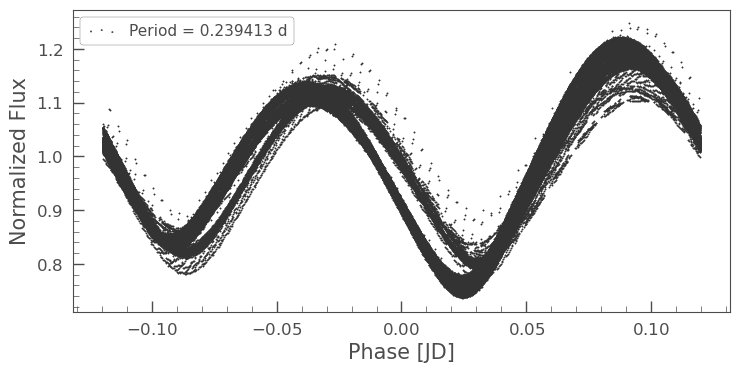

In [22]:
# Obtain a better estimate of the period

pg = lcq.to_periodogram(minimum_period = 0.2385, maximum_period=0.2405, oversample_factor=50)
new_period = pg.period_at_max_power

lcq.fold(new_period).scatter(label=f'Period = {new_period.value:.6f} d')
new_period

In [13]:
print(f'The period of our target is {new_period.value} {new_period.unit}')

The period of our target is 0.2394122772192037 d


### 7. Phase-fold with color to visualize period changes over time ###
Using the power of matplotlib's `colorbar` functionality, we can add a color to represent the time value of each data point.
- To do this, we first extract the data from Lightkurve's lightcurve object, which is the format that it is currently stored in. We also specify the period variable as `P` to make the plotting commands clearer. 
- To get the color, we specify `c = t` in the `plt.scatter` command, where `t` is the variable that represents the time value. This tells matplotlib that we want the color to correspond to the time point! 
- First, let's demonstrate how this works by again graphing the whole light curve below with the colorbar. 

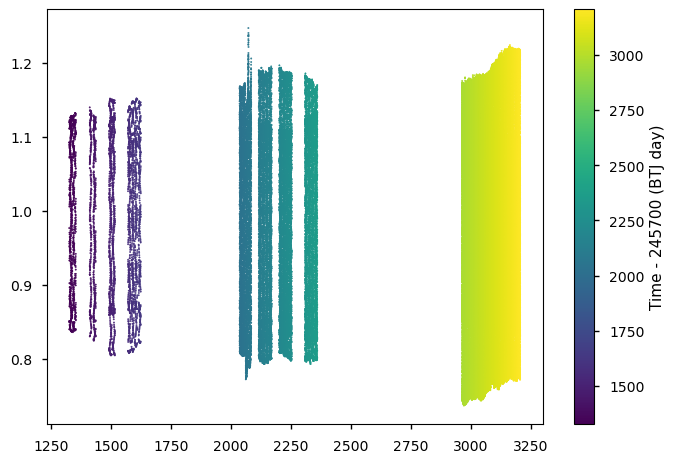

In [23]:
P = new_period.value
t = lcq['time'].value # save the time value of the data as the variable t 
y = lcq['flux'].value # save the flux value of the data as the variable y

# first plot 
plt.scatter(t,y, s=1, c=t)
plt.colorbar(label='Time - 245700 (BTJ day)')
plt.show()

Now, to perform the phase-folding operation manually, we recalculate the time coordinates as a percent of the period. 
- `s` is used to specify the size of each point 
- Again, we specify `c = t` to set the colors
- `alpha` can be used to set the transparency of each point. This is especially helpful when there are many points in the same area, which is the case here

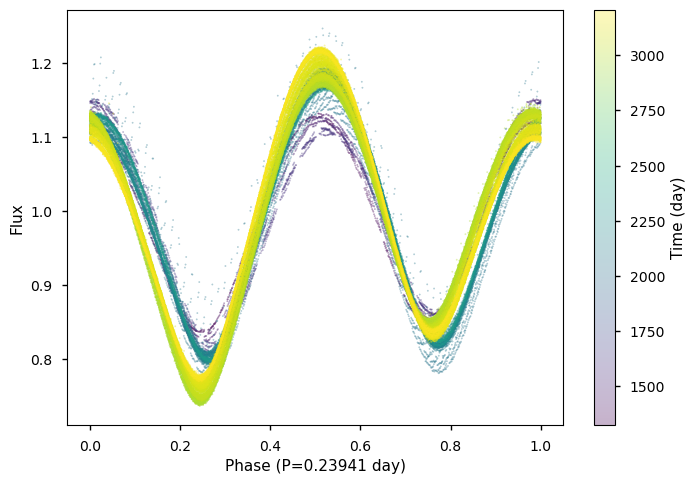

In [17]:
# second plot 
x = (t%P)/P

plt.scatter(x,y,s=1, c=t, alpha=0.3)
plt.colorbar(label='Time (day)')

plt.xlabel('Phase (P=%.5f day)' %(P))
plt.ylabel('Flux')
plt.show()

### 8. Make some observations ### 
In the phase-folded graph generated above, it looks like the yellow points are always to the left of the purple points, indicating that over the course of the observation period (2018 - 2023), the orbital period of the star must have gotten slightly shorter, i.e. the stars complete an orbit in a slightly shorter amount of time. This also means, excitingly, that the stars have gotten closer (by conservation of rotational momentum). 

We have now succeeded in showing that this star's period is fluctuating, seemingly shortening, over time. Since this is purely a visual observation, nothing is conclusive. However, this does give us a hint about what is happening with this binary star's orbit, even if we don't have exact numbers to describe it! Some possibilities: 
- A third body (planet, black hole, another star!!) 
- Stellar winds 
- Dark energy or dark matter
- Some yet unknown/overlooked physics or properties of stars

To determine what's going on, a researcher in the field might make a hypothesis, construct a model to predict the light curve, then compare observed to calculated data to see if they fit. 

## What's next? ##
You now have the tools to look at more binary stars and examine their period changes. Lightkurve has a lot more capabilities that we have barely scratched the surface of, including more robust, quantitative analysis, and more data products such as image files (Lightkurve Collaboration, 2018).

Even if you don't yet plan to begin your own astronomical adventures, I hope this guide has given you a better understanding and appreciation for the fields of astronomy and astrophysics, and the secrets that the night sky might hold. 💫💫

## References ## 

Borkovits, T., Hajdu, T., Sztakovics, J., et al. 2016, Monthly Notices of the Royal Astronomical Society, 455, 4136, doi:10.1093/mnras/stv2530

El-Badry, K., Conroy, C., Fuller, J., et al. 2022, arXiv, arXiv:2208.05488. https://ui.adsabs.harvard.edu/abs/2022arXiv220805488E/abstract

Fabrycky, D., & Tremaine, S. 2007, The Astrophysical Journal, 669, 1298, doi:10.1086/521702

Hwang, H. C., & Zakamska, N. L. 2020, Monthly Notices of the Royal Astronomical Society, 493, 2271, doi:10.1093/mnras/staa400

Lightkurve Collaboration. (2018, December). Lightkurve: Kepler and TESS time series analysis in Python. Version (2.4). Lightkurve. Astrophysics Source Code Library. Retrieved from https://docs.lightkurve.org/index.html.

MIT. (n.d.). Mission overview. TESS Transiting Exoplanet Survey Satellite.

NASA. (2013, August). Light curves - introduction. NASA. https://imagine.gsfc.nasa.gov/science/toolbox/timing1.html 

Zhatt. (2005). Orbit5.gif. Wikimedia Commons. Wikipedia. Retrieved from https://en.m.wikipedia.org/wiki/File:Orbit5.gif.